## Approach for H Clustering

Customer Mall Dataset

1. Import the Dataset

2. Find the Optimal No of Clusters using Dendrograms

3. Fit the Agglomerative Clustering

4. Visualize the Results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering # Clustering Algo...

In [3]:
cust = pd.read_csv("~/Downloads/Mall Customers.csv")

In [4]:
cust.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Clustering is applied only on Numerical Data. Catergorical Data such as Gender will not be able to help us in creating Hclustering. Hence, I would like to drop ID, Gender and Age Variable.

In [5]:
# Dropping ID, Genre, Age
x = cust.drop(["CustomerID", "Genre", "Age"], axis = 1) # Columns

In [7]:
# Applying K Means Clustering....
k = KMeans()

In [8]:
# Finding the Optimal Cluster Values - WCSS 
clusters = range(1,10)
wcss = []

for items in clusters:
    k = KMeans(n_clusters=items)
    k.fit(x)
    wcss.append(k.inertia_)

In [9]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 24986.52564064288,
 21826.936303231654]

Text(0.5, 1.0, 'Elbow Plot')

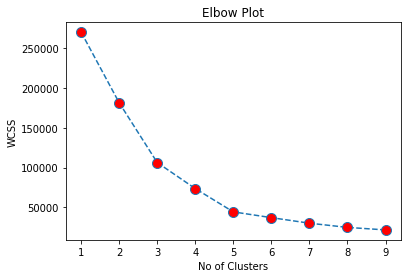

In [11]:
# Visualize the Results by creating Elbow Plot
plt.plot(clusters, wcss, "-o", markerfacecolor = "red", linestyle = "dashed", 
         markersize=10)
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Plot")

In [12]:
k = KMeans(n_clusters=5)

In [13]:
labels = k.fit_predict(x)

In [14]:
labels

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [15]:
k.inertia_ # Lowest of all...

44448.45544793371

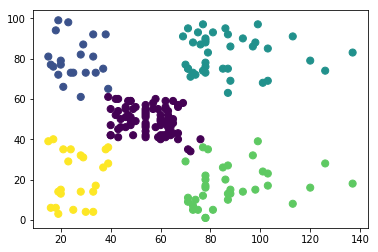

In [17]:
# Visualization
plt.scatter(x.iloc[:, 0], x.iloc[:,1], c = labels, s = 50)

# Hierarchical Clustering

Creation of Dendrogram

In [19]:
# Importing the Dendrogram Library
import scipy.cluster.hierarchy as sch

Text(0.5, 1.0, 'Dendrogram - Customer Spending Habits')

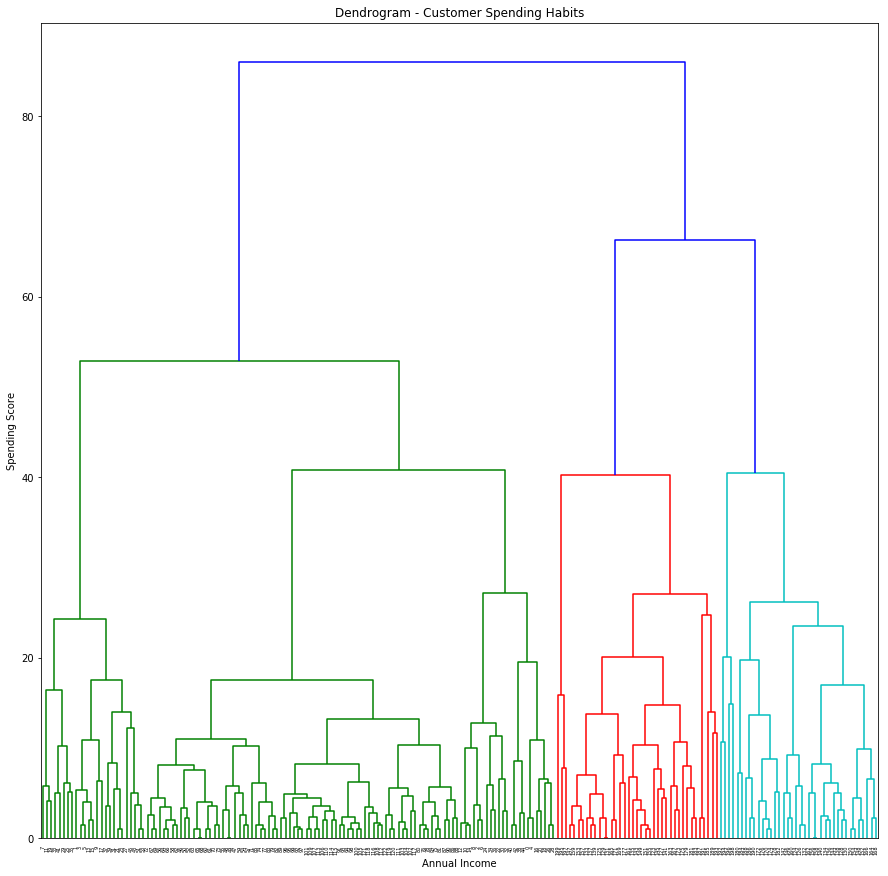

In [26]:
plt.figure(figsize=[15,15])
dend = sch.dendrogram(sch.linkage(x, method="weighted"))
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.xticks(rotation=90)
plt.title("Dendrogram - Customer Spending Habits")

In [27]:
Agg = AgglomerativeClustering(n_clusters=5)

In [28]:
labels_agg = Agg.fit_predict(x)

In [29]:
labels_agg

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [38]:
pd.DataFrame(labels_agg).nunique() # 0,1,2,3,4

# Adding Labels Back into the Data
x["Labels"] = labels_agg

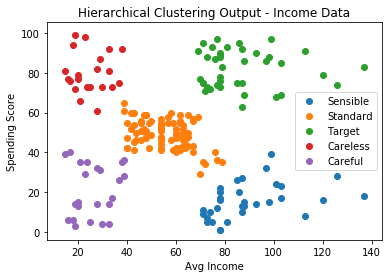

In [47]:
# Find the Value of my incme  where the Label is 0
# x = Income where the Label is 0
# y  = Spending Score is also 0
plt.scatter(x[x["Labels"]==0]["Annual Income (k$)"], 
            x[x["Labels"]==0]["Spending Score (1-100)"], label="Sensible")
plt.scatter(x[x["Labels"]==1]["Annual Income (k$)"], 
            x[x["Labels"]==1]["Spending Score (1-100)"], label="Standard")
plt.scatter(x[x["Labels"]==2]["Annual Income (k$)"], 
            x[x["Labels"]==2]["Spending Score (1-100)"], label="Target")
plt.scatter(x[x["Labels"]==3]["Annual Income (k$)"], 
            x[x["Labels"]==3]["Spending Score (1-100)"], label="Careless")
plt.scatter(x[x["Labels"]==4]["Annual Income (k$)"], 
            x[x["Labels"]==4]["Spending Score (1-100)"], label="Careful")

plt.xlabel("Avg Income")
plt.ylabel("Spending Score")
plt.title("Hierarchical Clustering Output - Income Data")
plt.legend()

In [48]:
# Iris Dataset
from sklearn.datasets import load_iris
i = load_iris()

In [49]:
iris = pd.DataFrame(i.data, columns=i.feature_names)

In [50]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
i.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

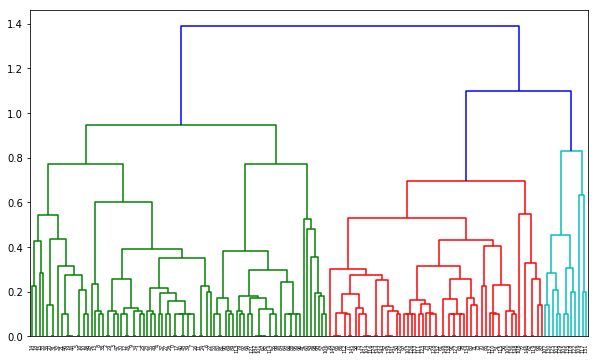

In [64]:
plt.figure(figsize=[10,6])
dend = sch.dendrogram(sch.linkage(irisnew, method='centroid'))

In [59]:
irisnew = iris.drop(["petal length (cm)", "petal width (cm)"], axis =1)

In [65]:
Agg = AgglomerativeClustering(n_clusters=3)

In [67]:
hc_pred = Agg.fit_predict(iris)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(i.target, hc_pred)

0.23333333333333334

In [70]:
# Scale the Dataset
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [74]:
new_iris = pd.DataFrame(sc.fit_transform(iris), columns=i.feature_names)

In [75]:
new_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [76]:
labels_agg = Agg.fit_predict(new_iris)

In [77]:
accuracy_score(i.target, labels_agg)

0.013333333333333334

In [78]:
iris["Labels"] = hc_pred

In [82]:
irisnew["Labels"] = hc_pred
irisnew.head()

,sepal length (cm),sepal width (cm),Labels
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


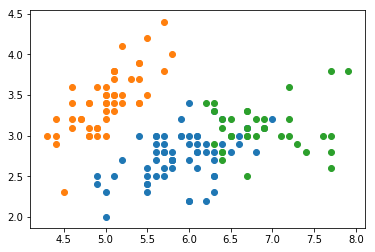

In [84]:
plt.scatter(iris[iris["Labels"]==0]["sepal length (cm)"], 
            iris[iris["Labels"]==0]["sepal width (cm)"])

plt.scatter(iris[iris["Labels"]==1]["sepal length (cm)"], 
            iris[iris["Labels"]==1]["sepal width (cm)"])

plt.scatter(iris[iris["Labels"]==2]["sepal length (cm)"], 
            iris[iris["Labels"]==2]["sepal width (cm)"])